In [1]:
# importing the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading the Data

In [2]:
# reading the file "day.csv" 

shared_bikes = pd.read_csv("day.csv")

In [3]:
# display the first 5 rows of the dataframe
shared_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# rows & columns in the dataframe
shared_bikes.shape

(730, 16)

In [5]:
# datatype of the columns when the file is read
shared_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# dropping columns instant, dteday, casual & registered

shared_bikes = shared_bikes.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1)
shared_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
shared_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [8]:
# Renaming columns yr -> year, mnth -> month, hum -> humidity, temp -> temperature(in Cel), atemp -> feeling_temperature(in cel)
shared_bikes.rename(columns = {'yr':'year', 'mnth':'month', 'hum':'humidity','temp':'temperature(in Cel)',
                               'atemp':'feeling_temperature(in Cel)','cnt':'count'}, inplace = True)

In [9]:
# changing season column to categorical variable

def season(seas):
    if (seas == 1):
        return 'spring'
    elif (seas == 2):
        return 'summer'
    elif (seas == 3):
        return 'fall'
    elif (seas == 4):
        return 'winter'
    
shared_bikes['season'] = shared_bikes['season'].apply(season)

In [10]:
# changing values in weathersit column to 1 -> Clear & Cloudy, 2-> Mist & Cloudy, 3 -> Light Snow & Rain, 4 -> Heavy Snow & Rain
def weather(values):
    if(values == 1):
        return 'Clear & Cloudy'
    elif(values == 2):
        return 'Mist & Cloudy'
    elif(values == 3):
        return 'Light Snow & Rain'
    elif(values == 4):
        return 'Heavy Snow & Rain'
    
shared_bikes['weathersit'] = shared_bikes['weathersit'].apply(weather)

In [11]:
# mapping values in weekday 0->Sunday, 1->Monday, 2->Tuesday, 3->Wednesday, 4->Thursday, 5->Friday, 6->Saturday

shared_bikes['weekday'] = shared_bikes['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [12]:
# mapping values in mnth as 1->Janaury,2->February,3->March,4->April,5->May,6->June,7->July,
# 8->August,9->September,10->October,11->November,12->December

shared_bikes['month'] = shared_bikes['month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',
                                                 8:'August',9:'September',10:'October',11:'November',12:'December'})

In [13]:
shared_bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature(in Cel),feeling_temperature(in Cel),humidity,windspeed,count
0,spring,0,January,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear & Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear & Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear & Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# Changing the datatype of the columns to category to appropriate datatype i.e category

shared_bikes['weathersit'] = shared_bikes['weathersit'].astype('category')
shared_bikes['season'] = shared_bikes['season'].astype('category')
shared_bikes['month'] = shared_bikes['month'].astype('category')
shared_bikes['weekday'] = shared_bikes['weekday'].astype('category')

In [15]:
shared_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   season                       730 non-null    category
 1   year                         730 non-null    int64   
 2   month                        730 non-null    category
 3   holiday                      730 non-null    int64   
 4   weekday                      730 non-null    category
 5   workingday                   730 non-null    int64   
 6   weathersit                   730 non-null    category
 7   temperature(in Cel)          730 non-null    float64 
 8   feeling_temperature(in Cel)  730 non-null    float64 
 9   humidity                     730 non-null    float64 
 10  windspeed                    730 non-null    float64 
 11  count                        730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


          weathersit    count
0     Clear & Cloudy  2257952
1  Light Snow & Rain    37869
2      Mist & Cloudy   995024


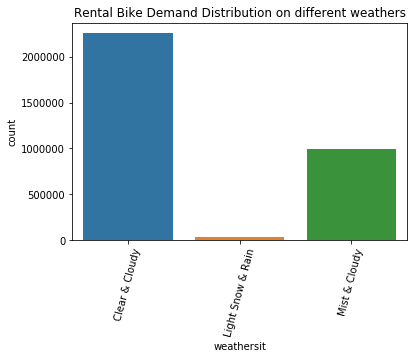

In [16]:
# shared bike distribution based on different weather condition
weather = shared_bikes.groupby('weathersit').sum().reset_index()
print(weather[['weathersit', 'count']])
chart = sns.barplot(x='weathersit',y='count',data = weather)
chart.set_xticklabels(chart.get_xticklabels(), rotation=75)
plt.title("Rental Bike Demand Distribution on different weathers")
plt.show()

#### Conclusion :- 
- Shared bike demand on a clear & cloudy is pretty high which is logically understood.
- Demand of bike is much lower when it is raining or snowfall is there.

   season    count
0    fall  1061129
1  spring   469514
2  summer   918589
3  winter   841613


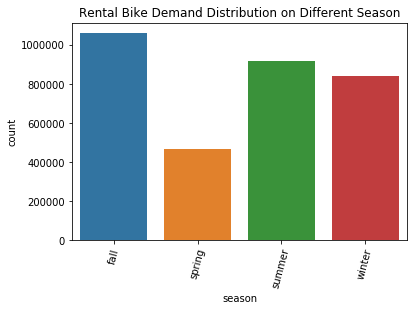

In [17]:
# shared bike demands on various season

season_group = shared_bikes.groupby('season').sum().reset_index()
print(season_group[['season', 'count']].head())
chart = sns.barplot(x='season', y='count', data=season_group)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 75)
plt.title("Rental Bike Demand Distribution on Different Season")
plt.show()

#### Conclusion :-
- Shared bike demand is considerably high as compared to summer and winter season
- But it is significantly low on a spring which is somewhat weird.

        month   count
0       April  269094
1      August  351194
2    December  211036
3    February  149518
4     January  134933
5        July  344948
6        June  346342
7       March  228920
8         May  331686
9    November  254831
10    October  322352
11  September  345991


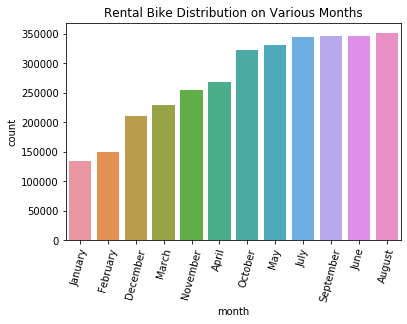

In [18]:
# shared bike demand on various months of a year.

month_group = shared_bikes.groupby('month').sum().reset_index()
print(month_group[['month', 'count']])
chart = sns.barplot(x='month', y='count', data = month_group, order = month_group.sort_values('count').month)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 75)
plt.title("Rental Bike Distribution on Various Months")
plt.show()

#### Conclusion :- 
- It is clear from the graph that demands of shared bikes keeps increasing from the March i.e of start of spring till August i.e end of fall.
- But as the season starts shifting towards the winter there is huge decline in the demand, from December to march(exclusive).

     weekday   count
0     Friday  487790
1     Monday  455503
2   Saturday  477807
3     Sunday  444027
4   Thursday  485395
5    Tuesday  469109
6  Wednesday  471214


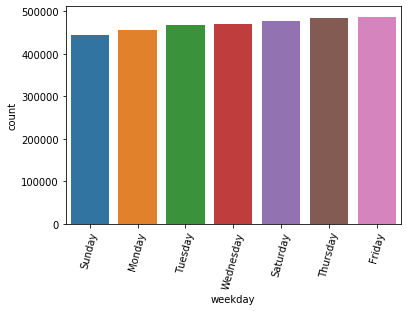

In [19]:
# shared bike demand based on different days of week

week_group = shared_bikes.groupby('weekday').sum().reset_index()
print(week_group[['weekday', 'count']])
chart = sns.barplot(x='weekday', y='count', data = week_group, order=week_group.sort_values('count').weekday)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 75)
plt.show()

#### Conclusion :- 
- Rental Bike demand on various days of the week almost same.

0    97.123288
1     2.876712
Name: holiday, dtype: float64


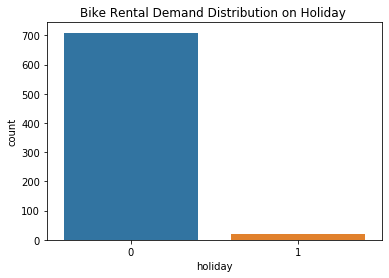

In [20]:
# shared bike demand on holiday here 0 -> working day, 1 -> non working day

print(shared_bikes.holiday.value_counts(normalize = True)*100)
sns.countplot(x='holiday',data=shared_bikes)
plt.title("Bike Rental Demand Distribution on Holiday ")
plt.show()

#### Conclusion :-
- Rental Bike demand is comparatively higher on a working day then on holiday which is logically understood.

1    68.356164
0    31.643836
Name: workingday, dtype: float64


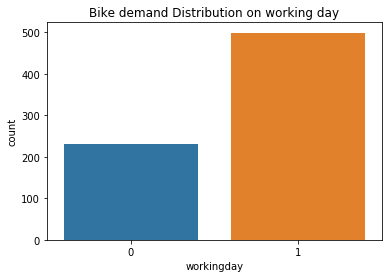

In [21]:
# shared bike demand on workingday here 1 -> workingday, 0 -> either weekend or holiday

print(shared_bikes.workingday.value_counts(normalize = True)*100)
sns.countplot(x='workingday',data=shared_bikes)
plt.title("Bike demand Distribution on working day")
plt.show()

### Detecting Outlier in few continuous columns

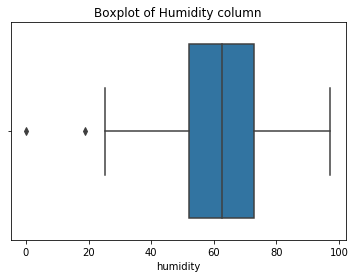

In [22]:
# outlier detection in humidity column
sns.boxplot(shared_bikes.humidity)
plt.title('Boxplot of Humidity column')
plt.show()

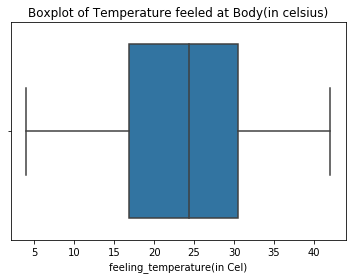

In [23]:
# outlier detection in feeling_temperature(in Cel) column
sns.boxplot(shared_bikes['feeling_temperature(in Cel)'])
plt.title('Boxplot of Temperature feeled at Body(in celsius)')
plt.show()

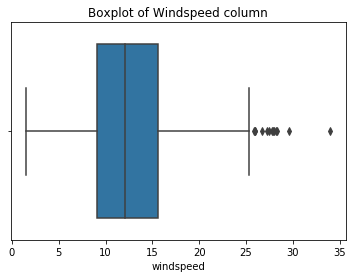

In [24]:
# outlier detection in windspeed column
sns.boxplot(shared_bikes.windspeed)
plt.title('Boxplot of Windspeed column')
plt.show()

#### Subjective Question :-
- Q) From analysis of categorical variable from the dataset, what could you infer about their effect on dependent variable?
- Ans) From analysis of categorical variable it very much clear that rental bike demand depends on weather, season, feeling_temperature(in Cel) as well as on the working days of the week which is understood as well they might be using this means of transportation to cover short distances like travelling from metro station to bus-stop or to reach tower inside the tech park etc.

#### PairPlot of numeric variables present in dataframe

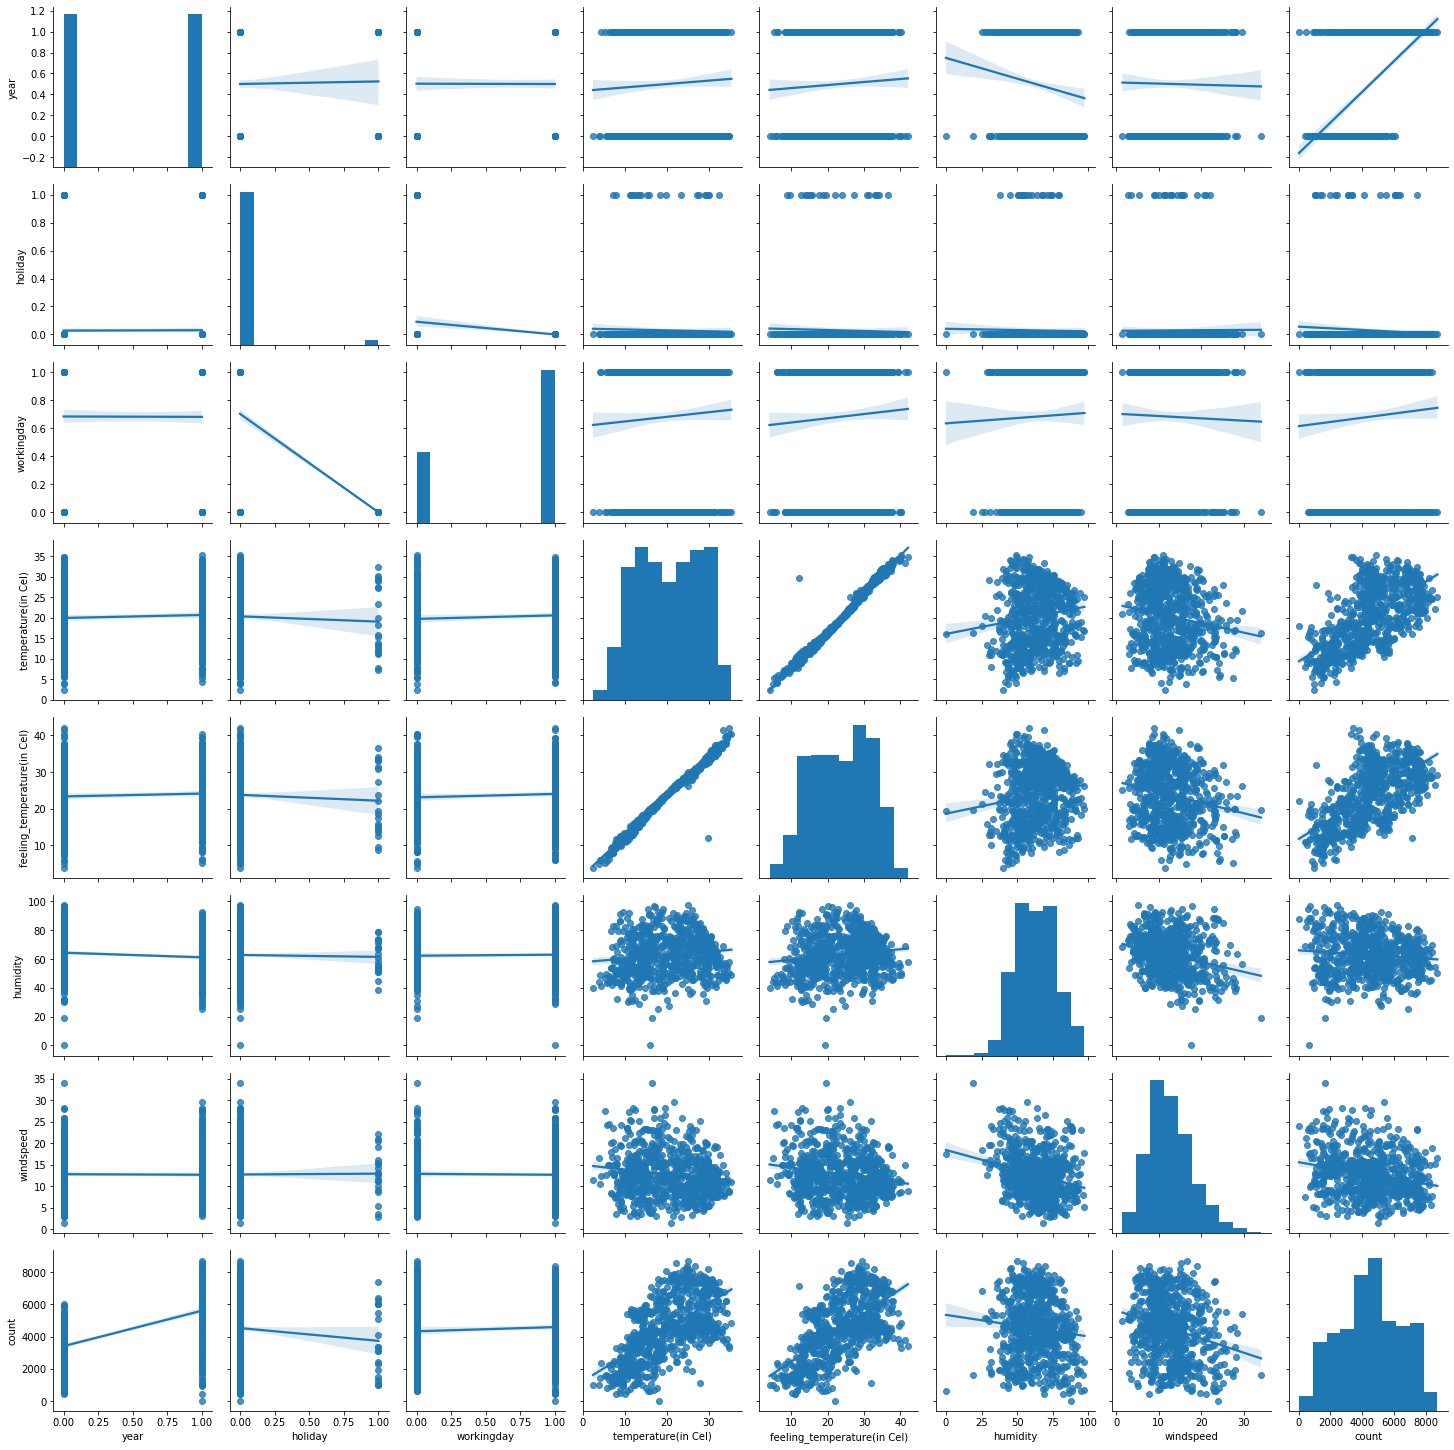

In [25]:
sns.pairplot(shared_bikes, kind = 'reg')
plt.show()

#### Subjective Question :-
- Q) Looking at the pairplot among the numerical variables, which one has highest correlation with target variable ?
- Ans) temperature(in cel) & feeling_temperature(in Cel) are the variables which are highly correlated with target variable.

### Correlation among different features and target variable i.e count

In [26]:
shared_bikes.corr()

,year,holiday,workingday,temperature(in Cel),feeling_temperature(in Cel),humidity,windspeed,count
year,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temperature(in Cel),0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
feeling_temperature(in Cel),0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
count,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


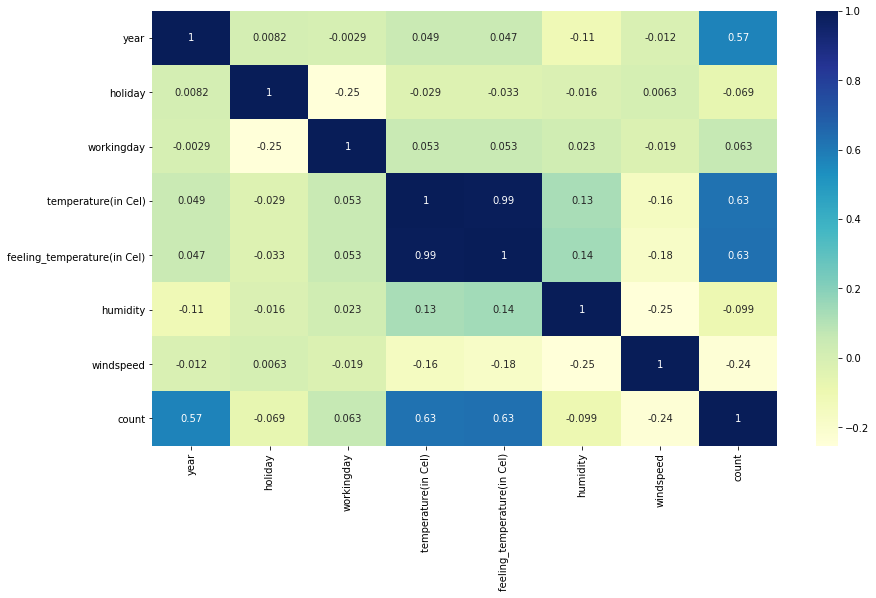

In [27]:
# heatmap of correlation matrix
plt.figure(figsize = (14, 8))
sns.heatmap(shared_bikes.corr(), annot = True, cmap='YlGnBu')
plt.show()

In [28]:
# from the above correlation heatmap we can see that temperature(in Cel) and feeling_temperature(in Cel) both are correlated to 
# each other hence will be dropping the temperature(in Cel) column

# shared_bikes = shared_bikes.drop(['feeling_temperature(in Cel)'], axis = 1)
shared_bikes = shared_bikes.drop(['temperature(in Cel)'], axis = 1)
shared_bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,feeling_temperature(in Cel),humidity,windspeed,count
0,spring,0,January,0,Saturday,0,Mist & Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist & Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear & Cloudy,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear & Cloudy,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear & Cloudy,11.46350,43.6957,12.522300,1600


### Data Preprocessing for Model Building

##### Creating Dummy variable for the column season, month, weekday, weathersit

In [29]:
# getting the dummy variable for column season, month, weekday, weathersit

dummy_var = pd.get_dummies(shared_bikes[['season', 'month', 'weekday', 'weathersit']], drop_first= True)
dummy_var.head()

,season_spring,season_summer,season_winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,...,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Subjective Question :- 
- Q) why is it important to use drop_first=True during dummy variable creation ?
- Ans) If we dont use drop_first=True condition then it is highly possible that dummy variable will be correlated to each other. If the variables are higly correleted to each then it can introduce multicollinearity which can adversely affect the model building and its significance can't be trusted, so to remove the redundancy it better to drop the first column

In [30]:
# concatenating the dummy variable to the original shared_bikes dataframe

shared_bikes = pd.concat([shared_bikes, dummy_var], axis=1)
shared_bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,feeling_temperature(in Cel),humidity,windspeed,...,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,spring,0,January,0,Saturday,0,Mist & Cloudy,18.18125,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,January,0,Sunday,0,Mist & Cloudy,17.68695,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,January,0,Monday,1,Clear & Cloudy,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,January,0,Tuesday,1,Clear & Cloudy,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,January,0,Wednesday,1,Clear & Cloudy,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [31]:
# dropping the column for which dummy variable has been created
# season, month, weekday, weathersit

shared_bikes = shared_bikes.drop(['season', 'month', 'weekday', 'weathersit'], axis=1)
shared_bikes.head()

,year,holiday,workingday,feeling_temperature(in Cel),humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


##### Splitting the shared_bike dataframe into train and test dataset in ration of 70% & 30% respectively

In [32]:
# splitting the data into train & test dataset
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(shared_bikes, train_size=0.7, test_size=0.3, random_state=100)

In [33]:
# shape of train & test dataframe
print("Test dataframe shape -", df_test.shape)
print("Train dataframe shape -", df_train.shape)

Test dataframe shape - (219, 29)
Train dataframe shape - (510, 29)


##### Rescaling the few continuous column like feeling_temperature(in Cel), humidity, windspeed in range of 0 & 1 using minmax scaler

In [34]:
# rescaling the features temperature(in Cel), humidity, windspeed
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['feeling_temperature(in Cel)', 'humidity', 'windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,feeling_temperature(in Cel),humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
653,1,0,1,0.501133,0.575354,0.300794,7534,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1


##### Dividing the train dataframe into independent & dependent variable, here independent/target variable is count

In [35]:
# dividing df_train into x & y variables

y_train = df_train.pop('count')
x_train = df_train

#### Model building Using RFE - Model - 1

In [36]:
# Building model using RFE & importing the necessary libraries

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
# Running RFE with output number of variable equal to 15
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(x_train, y_train)

In [38]:
# rank of feature variable selected for model building
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('feeling_temperature(in Cel)', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', True, 1),
 ('month_August', False, 6),
 ('month_December', True, 1),
 ('month_February', False, 3),
 ('month_January', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 7),
 ('month_March', False, 14),
 ('month_May', False, 4),
 ('month_November', True, 1),
 ('month_October', False, 12),
 ('month_September', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 8),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1)]

In [39]:
# segregating the supportive column 

col = x_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'feeling_temperature(in Cel)', 'humidity',
       'windspeed', 'season_spring', 'season_winter', 'month_December',
       'month_January', 'month_July', 'month_November', 'month_September',
       'weekday_Saturday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [40]:
# removing columns which were not involved in training the model from the x_train dataset.
x_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'month_August', 'month_February',
       'month_June', 'month_March', 'month_May', 'month_October',
       'weekday_Monday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [41]:
# Building the model using statsmodel, for the detailed statistics
x_train_rfe = x_train[col]

In [42]:
# adding constant variable
import statsmodels.api as sm
x_train_new = sm.add_constant(x_train_rfe)

In [43]:
# running the linear model
lm = sm.OLS(y_train, x_train_new).fit()

In [44]:
# summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Sat, 25 Jul 2020   Prob (F-statistic):          9.67e-187
Time:                        19:14:17   Log-Likelihood:                -4116.9
No. Observations:                 510   AIC:                             8266.
Df Residuals:                     494   BIC:                             8334.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [45]:
# calculating vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['features'] = x.columns
vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by = "vif", ascending = False)
vif

,features,vif
3,humidity,25.08
2,feeling_temperature(in Cel),16.88
4,windspeed,4.03
6,season_winter,2.93
5,season_spring,2.89
14,weathersit_Mist & Cloudy,2.26
0,year,2.06
10,month_November,1.82
8,month_January,1.75
7,month_December,1.54


#### Manual Elimination of feature, Model - 2

In [46]:
# dropping the feature month_January from the train data

# x_train_new1 = x_train_rfe.drop(['month_January'], axis = 1)
x_train_new1 = x_train_rfe.drop(['weekday_Saturday'], axis = 1)

In [47]:
# rebuilding the model

x_train_new2 = sm.add_constant(x_train_new1)

In [48]:
lm1 = sm.OLS(y_train, x_train_new2).fit()

In [49]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Sat, 25 Jul 2020   Prob (F-statistic):          2.58e-187
Time:                        19:14:17   Log-Likelihood:                -4118.3
No. Observations:                 510   AIC:                             8267.
Df Residuals:                     495   BIC:                             8330.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [50]:
# # dropping the const column

# x_train_lm = x_train_lm.drop(['const'], axis = 1)

In [51]:
# calculating the vif for the build model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_new1
vif['features'] = x.columns
vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by = "vif", ascending = False)
vif

,features,vif
3,humidity,25.08
2,feeling_temperature(in Cel),16.83
4,windspeed,4.00
6,season_winter,2.93
5,season_spring,2.89
13,weathersit_Mist & Cloudy,2.26
0,year,2.06
10,month_November,1.82
8,month_January,1.75
7,month_December,1.54


#### Model - 3

In [52]:
# dropping the feature weekday_Sunday from the x_train_rfe

x_train_new3 = x_train_new1.drop(['humidity'], axis = True)

In [53]:
# rebuilding the model
x_train_lm2 = sm.add_constant(x_train_new3)

In [54]:
# running the model
lm3 = sm.OLS(y_train, x_train_lm2).fit()

In [55]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Sat, 25 Jul 2020   Prob (F-statistic):          3.95e-185
Time:                        19:14:17   Log-Likelihood:                -4126.3
No. Observations:                 510   AIC:                             8281.
Df Residuals:                     496   BIC:                             8340.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [56]:
vif = pd.DataFrame()
x = x_train_new3
vif['features'] = x.columns
vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by = "vif", ascending = False)
vif

,features,vif
2,feeling_temperature(in Cel),4.57
3,windspeed,3.95
5,season_winter,2.55
4,season_spring,2.35
0,year,2.06
9,month_November,1.80
7,month_January,1.65
12,weathersit_Mist & Cloudy,1.53
6,month_December,1.46
8,month_July,1.35


#### Model - 4

In [57]:
# x_train_new4 = x_train_new3.drop(['holiday'], axis = True)
x_train_new4 = x_train_new3.drop(['month_November'], axis = True)

In [58]:
x_train_lm3 = sm.add_constant(x_train_new4)
lm4 = sm.OLS(y_train, x_train_lm3).fit()

In [59]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.6
Date:                Sat, 25 Jul 2020   Prob (F-statistic):          8.41e-185
Time:                        19:14:18   Log-Likelihood:                -4129.8
No. Observations:                 510   AIC:                             8286.
Df Residuals:                     497   BIC:                             8341.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [60]:
vif = pd.DataFrame()
x = x_train_new4
vif['features'] = x.columns
vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by = "vif", ascending = False)
vif

,features,vif
2,feeling_temperature(in Cel),4.54
3,windspeed,3.91
4,season_spring,2.35
0,year,2.06
5,season_winter,1.64
7,month_January,1.64
11,weathersit_Mist & Cloudy,1.53
8,month_July,1.35
6,month_December,1.29
9,month_September,1.20


#### Model - 5

In [61]:
# x_train_new5 = x_train_new4.drop(['temperature(in Cel)'], axis = True)
x_train_new5 = x_train_new4.drop(['month_December'], axis = True)

In [62]:
x_train_lm4 = sm.add_constant(x_train_new5)
lm5 = sm.OLS(y_train, x_train_lm4).fit()

In [63]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.4
Date:                Sat, 25 Jul 2020   Prob (F-statistic):          5.75e-185
Time:                        19:14:18   Log-Likelihood:                -4132.2
No. Observations:                 510   AIC:                             8288.
Df Residuals:                     498   BIC:                             8339.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [64]:
vif = pd.DataFrame()
x = x_train_new5
vif['features'] = x.columns
vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by = "vif", ascending = False)
vif

,features,vif
2,feeling_temperature(in Cel),4.54
3,windspeed,3.91
4,season_spring,2.24
0,year,2.06
6,month_January,1.60
10,weathersit_Mist & Cloudy,1.53
5,season_winter,1.40
7,month_July,1.35
8,month_September,1.20
9,weathersit_Light Snow & Rain,1.08


#### Model - 6

In [65]:
# x_train_new6 = x_train_new5.drop(['month_July'], axis = True)
x_train_new6 = x_train_new5.drop(['month_January'], axis = True)

In [66]:
x_train_lm5 = sm.add_constant(x_train_new6)
lm6 = sm.OLS(y_train, x_train_lm5).fit()

In [67]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.0
Date:                Sat, 25 Jul 2020   Prob (F-statistic):          5.68e-185
Time:                        19:14:18   Log-Likelihood:                -4135.1
No. Observations:                 510   AIC:                             8292.
Df Residuals:                     499   BIC:                             8339.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [68]:
vif = pd.DataFrame()
x = x_train_new6
vif['features'] = x.columns
vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by = "vif", ascending = False)
vif

,features,vif
2,feeling_temperature(in Cel),4.51
3,windspeed,3.90
0,year,2.05
4,season_spring,1.63
9,weathersit_Mist & Cloudy,1.52
5,season_winter,1.40
6,month_July,1.35
7,month_September,1.20
8,weathersit_Light Snow & Rain,1.08
1,holiday,1.04


## Residual analysis

In [69]:
y_train_count = lm6.predict(x_train_lm5)

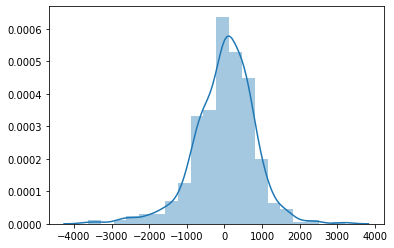

In [70]:
# plot the histograms of the errors
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)

### Subjective Question :-
- Q) How did you validate assumptions of linear regression after building model on training set ?

- Ans) One of the major assumptions of linear regression is to check whether the error terms should be normally distributed, and in this case when we use final model 6 to predict values on the training and when we calculated the error terms between predicted train values (i.e y_train_count) and acutall values(i.e y_train) and plotted it we got a normally distributed graph.

## Making Predictions

In [71]:
num_vars = ['feeling_temperature(in Cel)', 'humidity', 'windspeed']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [72]:
df_test.head()

,year,holiday,workingday,feeling_temperature(in Cel),humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
184,0,1,0,0.769660,0.657364,0.084219,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496145,0.837699,0.334206,2659,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.741471,0.314298,0.537414,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


### Dividing into x_test & y_test

In [73]:
y_test = df_test.pop('count')
x_test = df_test

In [74]:
x_test_new = x_test[x_train_new6.columns]

# adding a const variable
x_test_new = sm.add_constant(x_test_new)

In [75]:
# predict the count values
y_pred = lm6.predict(x_test_new)

### Model Evaluation

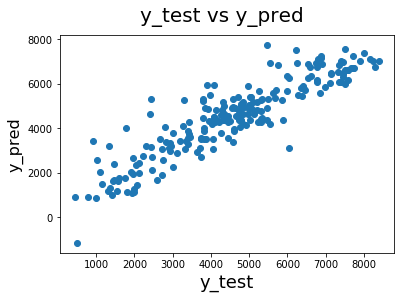

In [76]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [77]:
# r2 value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8089924291633283

#### Subjective Question :- 
- Based on final model, which are top 3 features contributing significantly towards explaining demand of shared bike?
- feeling_temperature(in Cel), year, month_september

we have a equation of line as follows :-

- $ count = 2043*year - 826*holiday + 4034.91*feeling_temperature(in Cel) - 1092.01*windspeed - 1020.56*season_spring + 338.69*season_winter - 590.99*month_July + 521.97*month_September - 2450.46*weathersit_Light Snow & Rain - 710.15*weathersit_Mist & Cloudy $